In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
from collections import defaultdict
from ast import literal_eval

from from_excel_to_list import from_excel_to_list

In [2]:
## Plot transposons along the whole genome


## Importing pergene files 

pergene_files=[]
#data_dir= "../satay/data_files/data_unmerged/"
#data_dir="../transposonmapper/data_files/files4test/"
data_dir="../postprocessed-data/"
#data_dir="../transposonmapper/data_files/"
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith("pergene_insertions.xlsx"):
            pergene_files.append(os.path.join(root, file))

list_data=[]
for i in pergene_files:
    list_data.append(pd.read_excel(i,engine='openpyxl',index_col="Unnamed: 0"))




In [3]:
keys= backgrounds= ['wt_merged','bem1-aid_a','bem1-aid_b','dbem1dbem3_a','dbem1dbem3_b',
'dnrp1_merged','dbem3_merged']

In [4]:
data_post=[]

for i in keys:
    data_post.append(pd.read_excel(data_dir+i+".xlsx",index_col="Unnamed: 0",engine='openpyxl'))
    

list_data_post=pd.concat(data_post,axis=0,keys=keys)
list_data_post.drop(columns=["Feature_alias","Feature_name"],inplace=True)
list_data_post.fillna(1,inplace=True)

In [5]:
def romanize(number):
   n2rMap = {1000:'M', 900:'CM', 500:'D', 400:'CD', 100:'C', 90:'XC', 50:'L', 40:'XL', 10:'X', 9:'IX', 5:'V', 4:'IV', 1:'I'}
   roman = ""
   for key in n2rMap.keys():
      count = int(number / key)
      roman += n2rMap[key] * count
      number -= key * count
   return roman

In [6]:
chrom=[]
for i in np.arange(1,17):
    chrom.append(romanize(i))
    

In [7]:
data=list_data_post.loc["wt_merged"]
data.columns

Index(['Standard_name', 'Feature_type', 'Essentiality', 'Chromosome',
       'Position', 'Nbasepairs', 'Ninsertions', 'Ninsertions_truncatedgene',
       'Nreads', 'Nreads_list', 'Nreads_truncatedgene', 'Nreadsperinsrt',
       'Nreadsperinsrt_truncatedgene'],
      dtype='object')

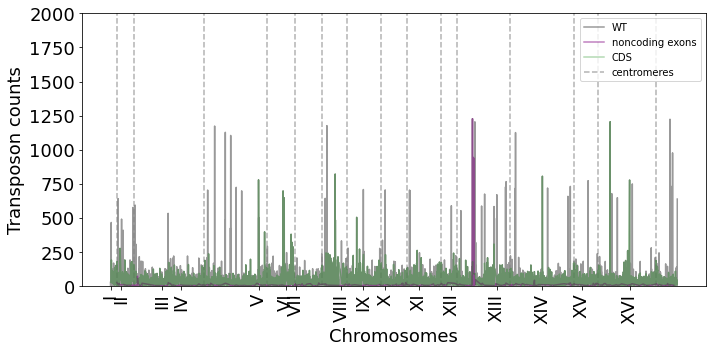

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
data=list_data_post.loc["wt_merged"]
plt.plot(data.index,data["Ninsertions"],color="gray",label="WT",alpha=0.8)

coordinates_chrom=[]

for i in chrom:
    coordinates_chrom.append((np.where(data["Chromosome"]==i)[0][0]))

plt.xticks(coordinates_chrom,chrom,fontsize=18,rotation=90);
plt.ylim(0,2000)

centromere_pos=np.where(list_data_post.loc["wt_merged"]["Feature_type"]=="Centromere")

for centromere in centromere_pos:
    plt.vlines(centromere,0,2000,color="black",linestyles="dashed",alpha=0.3,label="centromeres")

plt.ylabel("Transposon counts",fontsize=18)


noncoding_pos=np.where(list_data_post.loc["wt_merged"]["Feature_type"]=="Noncoding_exon")

plt.plot(noncoding_pos[0],data.loc[noncoding_pos,"Ninsertions"],alpha=0.5,
color="purple",label="noncoding exons")

gene_pos=np.where(list_data_post.loc["wt_merged"]["Feature_type"]=="Gene; Verified")

plt.plot(gene_pos[0],data.loc[gene_pos,"Ninsertions"],alpha=0.3,color="green",label="CDS")
plt.legend()
plt.xlabel("Chromosomes",fontsize=18)
plt.yticks(fontsize=18);
plt.tight_layout()

In [9]:
fig.savefig("../figures/figures_thesis_chapter_2/transposon_counts_pergene_wt_merged_with features.png",
dpi=400,transparent=True)


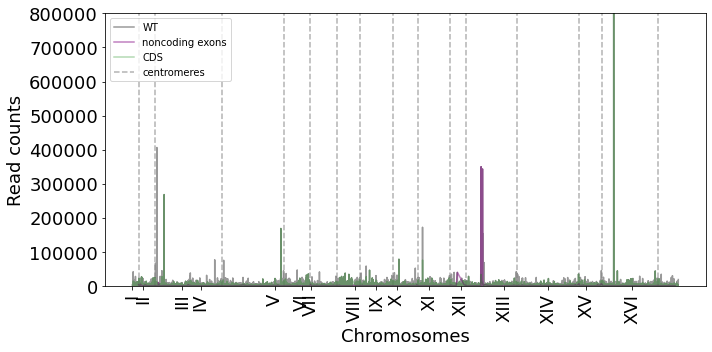

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
data=list_data_post.loc["wt_merged"]
plt.plot(data.index,data["Nreads"],color="gray",label="WT",alpha=0.8)

coordinates_chrom=[]

for i in chrom:
    coordinates_chrom.append((np.where(data["Chromosome"]==i)[0][0]))

plt.xticks(coordinates_chrom,chrom,fontsize=18,rotation=90);


centromere_pos=np.where(list_data_post.loc["wt_merged"]["Feature_type"]=="Centromere")

for centromere in centromere_pos:
    plt.vlines(centromere,0,1000000,color="black",linestyles="dashed",alpha=0.3,label="centromeres")




noncoding_pos=np.where(list_data_post.loc["wt_merged"]["Feature_type"]=="Noncoding_exon")

plt.plot(noncoding_pos[0],data.loc[noncoding_pos,"Nreads"],alpha=0.5,
color="purple",label="noncoding exons")

gene_pos=np.where(list_data_post.loc["wt_merged"]["Feature_type"]=="Gene; Verified")

plt.plot(gene_pos[0],data.loc[gene_pos,"Nreads"],alpha=0.3,color="green",label="CDS")
plt.ylabel("Read counts",fontsize=18)
plt.xlabel("Chromosomes",fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.ylim(0,800000)
plt.tight_layout()

In [11]:
fig.savefig("../figures/figures_thesis_chapter_2/read_counts_pergene_wt_merged_with features.png",
dpi=400,transparent=True)

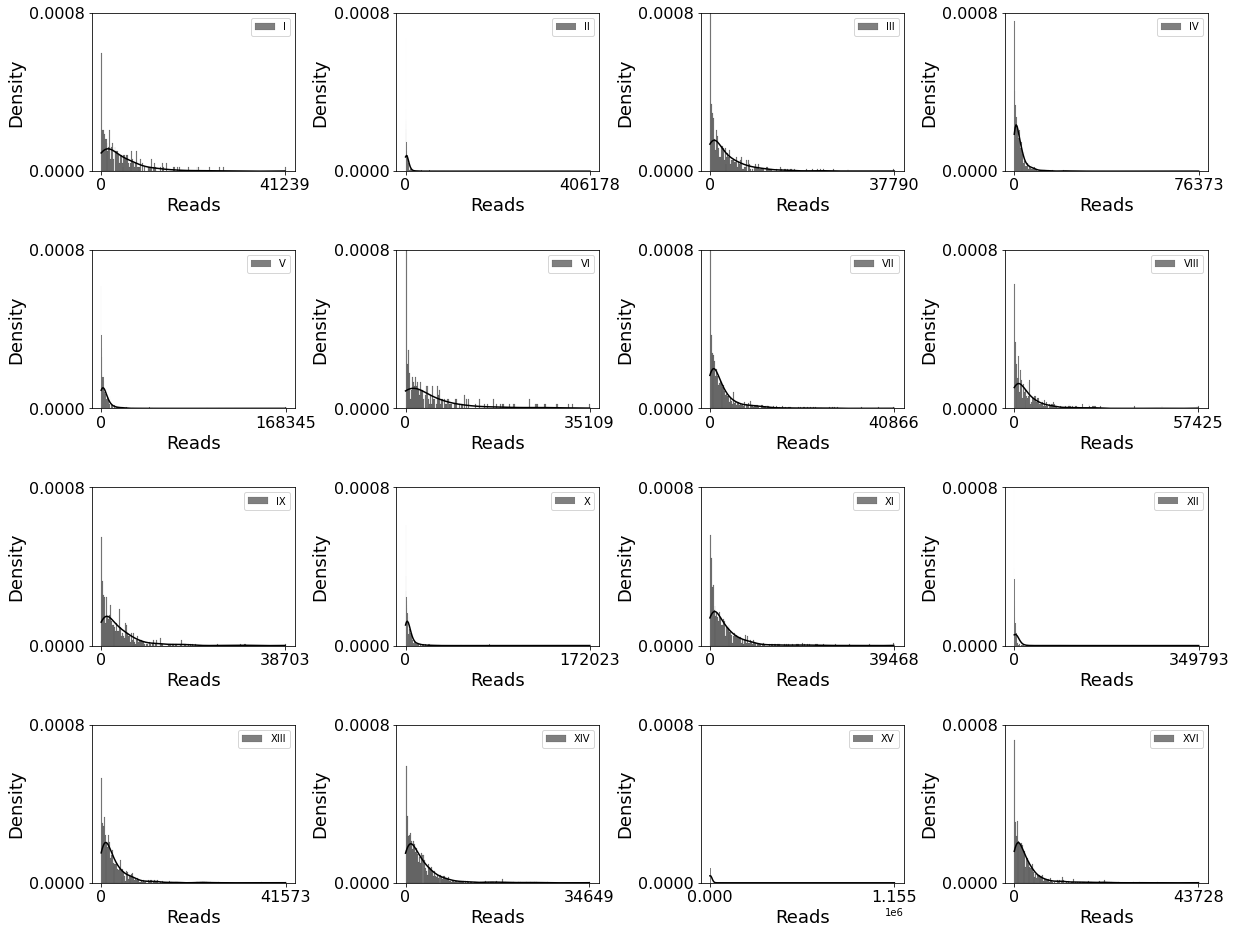

In [24]:
## Reads distribution per chromosome:
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(20,16))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
for i in np.arange(1,17):
    plt.subplot(4,4,i)
    #data[data.loc[:,"Chromosome"]==chrom[i-1]]["Nreads"].hist(bins=100,alpha=0.5,color="black",label=chrom[i-1])
    x=data[data.loc[:,"Chromosome"]==chrom[i-1]]["Nreads"]
    sns.histplot(x,label=chrom[i-1],
    stat="density",binwidth=200,kde=True,color="black",alpha=0.5)
    plt.xlabel("Reads",fontsize=18)
    plt.ylabel("Density",fontsize=18)
    plt.xticks(ticks= [min(x),max(x)],fontsize=16)
    plt.ylim(0,0.0008)
    plt.yticks(ticks= [0,0.0008],fontsize=16)
    plt.legend()
    # plt.tick_params(
    #     axis='x',          # changes apply to the x-axis
    #     which='both',      # both major and minor ticks are affected
    #     bottom=False,      # ticks along the bottom edge are off
    #     top=False,         # ticks along the top edge are off
    #     labelbottom=False) # labels along the bottom edge are off

In [25]:
fig.savefig("../figures/figures_thesis_chapter_2/read_distribution_per_chromosome.png",
dpi=400,transparent=True)

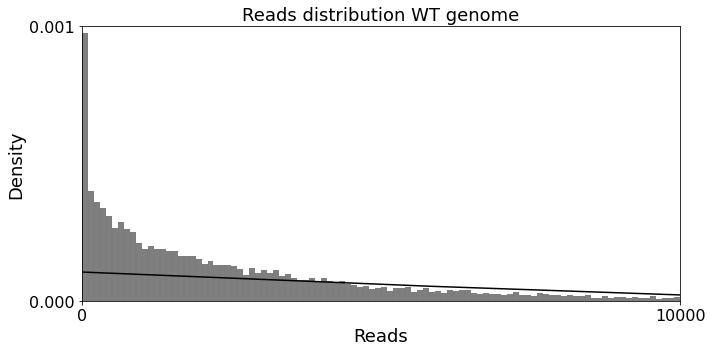

In [27]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,5))

sns.histplot(data.loc[:,"Nreads"],stat="density",binwidth=100,kde=True,color="black",
alpha=0.5)
plt.xlabel("Reads",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.xlim(0,10000)
plt.ylim(0,0.001)
plt.yticks(ticks= [0,0.001],fontsize=16)
plt.xticks(ticks= [0,10000],fontsize=16)

plt.title("Reads distribution WT genome",fontsize=18)
plt.tight_layout()

In [23]:
fig.savefig("../figures/figures_thesis_chapter_2/read_distribution_genome.png",
dpi=400,transparent=True)